In [450]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb
import graphviz as graphviz
from sklearn.metrics import confusion_matrix
from graphviz import Digraph
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn import datasets # import standard datasets
from sklearn import tree     # decision tree classifier
from sklearn import naive_bayes # naive bayes classifier 
from sklearn import svm        # svm classifier
from sklearn import ensemble   # ensemble classifiers
from sklearn import metrics    # performance evaluation metrics
from sklearn import model_selection
from sklearn import preprocessing 
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets # import standard datasets
from sklearn import neighbors  # knn classifier
#from sklearn.model_selection import train_test_split
#from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold
%matplotlib inline

# Part A

In [ ]:
## Question 1: Group Info

Group Name: Plum

Group Member: Eric Grant

## Question 2: Decision Trees

### (a)

### Original:

1 - (100/210)^2 - (50/210)^2 - (60/210)^2 = 0.63

### Split 1:

N(1,1) = 1 - (56/68)^2 - (12/68)^2 - 0 = 0.29 <br>
N(1,2) = 1 - (44/142)^2 - (38/142)^2 - (60/142)^2 = 0.65<br>
Total Gain = 0.63 - (0.29 + 0.65) / 2 = 0.16

### Split 2:

N(2,1) = 1 - (62/80)^2 - (18/80)^2 - 0 = 0.35 <br>
N(2,2) = 1 - (28/63)^2 - (11/63)^2 - (24/63)^2 = 0.63 <br>
N(2,3) = 1 - (10/67)^2 - (21/67)^2 - (36/67)^2 = 0.59 <br>
Total Gain = 0.63 - (0.35 + 0.63 + 0.59) / 3 = 0.11

### (b)

Split 1 has the most gain and is the preffered node.

### (c)

All logs are base 2

### Original:

-(100/210)log(100/210) - (50/210)log(50/210) - (60/210)log(60/210) = 1.52

### Split 1:

N(1,1) = -(56/68)log(56/68) - (12/68)log(12/68) - 0 = 0.67 <br>
N(1,2) = -(44/142)log(44/142) - (38/142)log(38/142) - (60/142)log(60/142) = 1.56 <br>
Total Gain = 1.52 - (0.67 + 1.56) / 2 = 0.41

### Split 2:

N(2,1) = -(62/80)log(62/80) - (18/80)log(18/80) - 0 = 0.77 <br>
N(2,2) = -(28/63)log(28/63) - (11/63)log(11/63) - (24/63)log(24/63) = 1.49 <br>
N(2,3) = -(10/67)log(10/67) - (21/67)log(21/67) - (36/67)log(36/67) = 1.42 <br>
Total Gain = 1.52 - (0.77 + 1.49 + 1.42) / 3 = 0.29

### (d)

Split 1 has the most gain and is the preffered node.

## Question 3: Naıve Bayes Classification

### (a)

In [451]:
fruits = pd.read_csv('./fruit.txt', delimiter = ",", header=None)
fruits.columns = ["Type", "Weight", "Height", "Width"]
fruits = fruits[fruits['Type'] != 3]
apples = fruits[fruits['Type'] == 1]
oranges = fruits[fruits['Type'] == 2]
totalApple = fruits[fruits['Type'] == 1].size
totalOrange = fruits[fruits['Type'] == 2].size
totalFruit = fruits.size
totalTypes = 2
totalWeights = 2
totalHeights = 3
totalWidths = 3
alpha = 1

data = [
    ["P(apple)",totalApple/totalFruit],
    ["P(orange)",totalOrange/totalFruit]
    ]

table01 = pd.DataFrame(data, columns=['Prior','Prob.'])
display(table01)
print()

data = [
    ["P(Wt = 0 | apple)", (apples[ apples['Weight'] == 0 ].size + alpha) / (totalApple + totalWeights)],
    ["P(wt = 1 | apple)", (apples[ apples['Weight'] == 1 ].size + alpha) / (totalApple + totalWeights)],
    ["P(wt = 0 | orange)", (oranges[ oranges['Weight'] == 0 ].size + alpha) / (totalOrange + totalWeights)],
    ["P(wt = 1 | orange)", (oranges[ oranges['Weight'] == 1 ].size + alpha) / (totalOrange + totalWeights)]
    ]

table02 = pd.DataFrame(data, columns=['Cond.','Prob.'])
display(table02)
print()

data = [
    ["P(Ht = 0 | apple)", (apples[ apples['Height'] == 0 ].size + alpha) / (totalApple + totalHeights)],
    ["P(Ht = 1 | apple)", (apples[ apples['Height'] == 1 ].size + alpha) / (totalApple + totalHeights)],
    ["P(Ht = 2 | apple)", (apples[ apples['Height'] == 2 ].size + alpha) / (totalApple + totalHeights)],
    ["P(Ht = 0 | orange)", (oranges[ oranges['Height'] == 0 ].size + alpha) / (totalOrange + totalHeights)],
    ["P(Ht = 1 | orange)", (oranges[ oranges['Height'] == 1 ].size + alpha) / (totalOrange + totalHeights)],
    ["P(Ht = 2 | orange)", (oranges[ oranges['Height'] == 2 ].size + alpha) / (totalOrange + totalHeights)]
    ]

table03 = pd.DataFrame(data, columns=['Cond.','Prob.'])
display(table03)
print()

data = [
    ["P(Wid = 0 | apple)", (apples[ apples['Width'] == 0 ].size + alpha) / (totalApple + totalWidths)],
    ["P(Wid = 1 | apple)", (apples[ apples['Width'] == 1 ].size + alpha) / (totalApple + totalWidths)],
    ["P(Wid = 2 | apple)", (apples[ apples['Width'] == 2 ].size + alpha) / (totalApple + totalWidths)],
    ["P(Wid = 0 | orange)", (oranges[ oranges['Width'] == 0 ].size + alpha) / (totalOrange + totalWidths)],
    ["P(Wid = 1 | orange)", (oranges[ oranges['Width'] == 1 ].size + alpha) / (totalOrange + totalWidths)],
    ["P(Wid = 2 | orange)", (oranges[ oranges['Width'] == 2 ].size + alpha) / (totalOrange + totalWidths)]
    ]

table04 = pd.DataFrame(data, columns=['Cond.','Prob.'])
display(table04)
print()

,Prior,Prob.
0,P(apple),0.5
1,P(orange),0.5


,Cond.,Prob.
0,P(Wt = 0 | apple),0.884615
1,P(wt = 1 | apple),0.115385
2,P(wt = 0 | orange),0.628205
3,P(wt = 1 | orange),0.371795


,Cond.,Prob.
0,P(Ht = 0 | apple),0.316456
1,P(Ht = 1 | apple),0.670886
2,P(Ht = 2 | apple),0.012658
3,P(Ht = 0 | orange),0.569620
4,P(Ht = 1 | orange),0.265823
5,P(Ht = 2 | orange),0.164557


,Cond.,Prob.
0,P(Wid = 0 | apple),0.569620
1,P(Wid = 1 | apple),0.367089
2,P(Wid = 2 | apple),0.063291
3,P(Wid = 0 | orange),0.215190
4,P(Wid = 1 | orange),0.367089
5,P(Wid = 2 | orange),0.417722


### (b)

### Sample 1:

apple = 0.5 * 0.115385 * 0.670886 * 0.569620 = 0.02204719368 <br>
orange = 0.5 * 0.371795 * 0.265823 * 0.215190 = 0.0106337927 <br>
Predicted = apple

### Sample 2:

apple = 0.5 * 0.884615 * 0.316456 * 0.367089 = 0.05138176384 <br>
orange = 0.5 * 0.628205 * 0.569620 * 0.367089 = 0.06567922103 <br>
Predicted = orange

### Sample 3:

apple = 0.5 * 0.884615 * 0.316456 * 0.367089 = 0.05138176384 <br>
orange = 0.5 * 0.628205 * 0.569620 * 0.367089 = 0.06567922103 <br>
Predicted = orange

### Sample 4:

apple = 0.5 * 0.115385 * 0.316456 * 0.569620 = 0.01039963082 <br>
orange = 0.5 * 0.371795 * 0.569620 * 0.215190 = 0.02278667007 <br>
Predicted = orange

### (c)

Sample 1: TP <br>
Sample 2: FN <br>
Sample 3: TN <br>
Sample 4: TN

# Part B

## Question 4

In [452]:
data = [
    [1, 0.98],
    [0, 0.92],
    [1, 0.85],
    [0, 0.77],
    [0, 0.71],
    [1, 0.64],
    [1, 0.50],
    [1, 0.39],
    [0, 0.34],
    [0, 0.31]
    ]

newData = []
for d1 in data:
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    for d2 in data:
        if d2[1] >= d1[1] and d2[0] == 1:
            TP += 1
        elif d2[1] >= d1[1] and d2[0] == 0:
            FP += 1
        elif d2[1] < d1[1] and d2[0] == 1:
            FN += 1
        elif d2[1] < d1[1] and d2[0] == 0:
            TN += 1
    newData.append([d1[1], TP/(TP+FN), FP/(FP+TN), (TP+TN)/(TP+FP+FN+TN)])

matrix = pd.DataFrame(newData, columns=['Thres.','TPR','FPR','Acc.'])
display(matrix)

,Thres.,TPR,FPR,Acc.
0,0.98,0.2,0.0,0.6
1,0.92,0.2,0.2,0.5
2,0.85,0.4,0.2,0.6
3,0.77,0.4,0.4,0.5
4,0.71,0.4,0.6,0.4
5,0.64,0.6,0.6,0.5
6,0.50,0.8,0.6,0.6
7,0.39,1.0,0.6,0.7
8,0.34,1.0,0.8,0.6
9,0.31,1.0,1.0,0.5


## Question 5

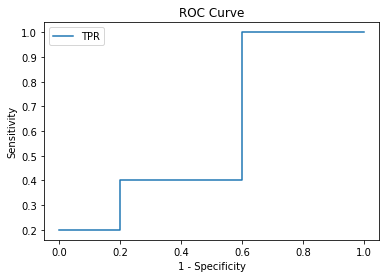

In [453]:
roc = matrix.plot(x="FPR", y="TPR", title="ROC Curve")
roc.set(xlabel="1 - Specificity", ylabel="Sensitivity")
plt.show()

## Question 6: Spam Trees

### (a)

In [454]:
colList = ["day of week","time of day","size.kb","box","local","digits","name","special","credit","sucker","porn","chain","username","large text","spam"]
colListNoSpam = ["day of week","time of day","size.kb","box","local","digits","name","special","credit","sucker","porn","chain","username","large text"]
spam = pd.read_csv("./spam.csv", usecols=colList)

### (b)

In [455]:
error = round(len(spam[spam["spam"] == "yes"]) / len(spam),4)*100
print("i.\tPercent Emails Spam:", error, "%")
print("ii.\tCosntant classifier should always predict not spam.")
print("iii.\tError Rate:", error,"%")

i.	Percent Emails Spam: 32.7 %
ii.	Cosntant classifier should always predict not spam.
iii.	Error Rate: 32.7 %


### (c)

In [456]:
spamNum = spam.copy()
enc = OrdinalEncoder()
enc.fit(spam)
spamNum[colList] = enc.transform(spam)

xtrain, xtest, ytrain, ytest = train_test_split(spamNum[colListNoSpam], spamNum["spam"], test_size=0.2, random_state=124) 

scaler = preprocessing.StandardScaler().fit(xtrain)
Xtrain_transformed = scaler.transform(xtrain)
Xtest_transformed = scaler.transform(xtest)

### (d)

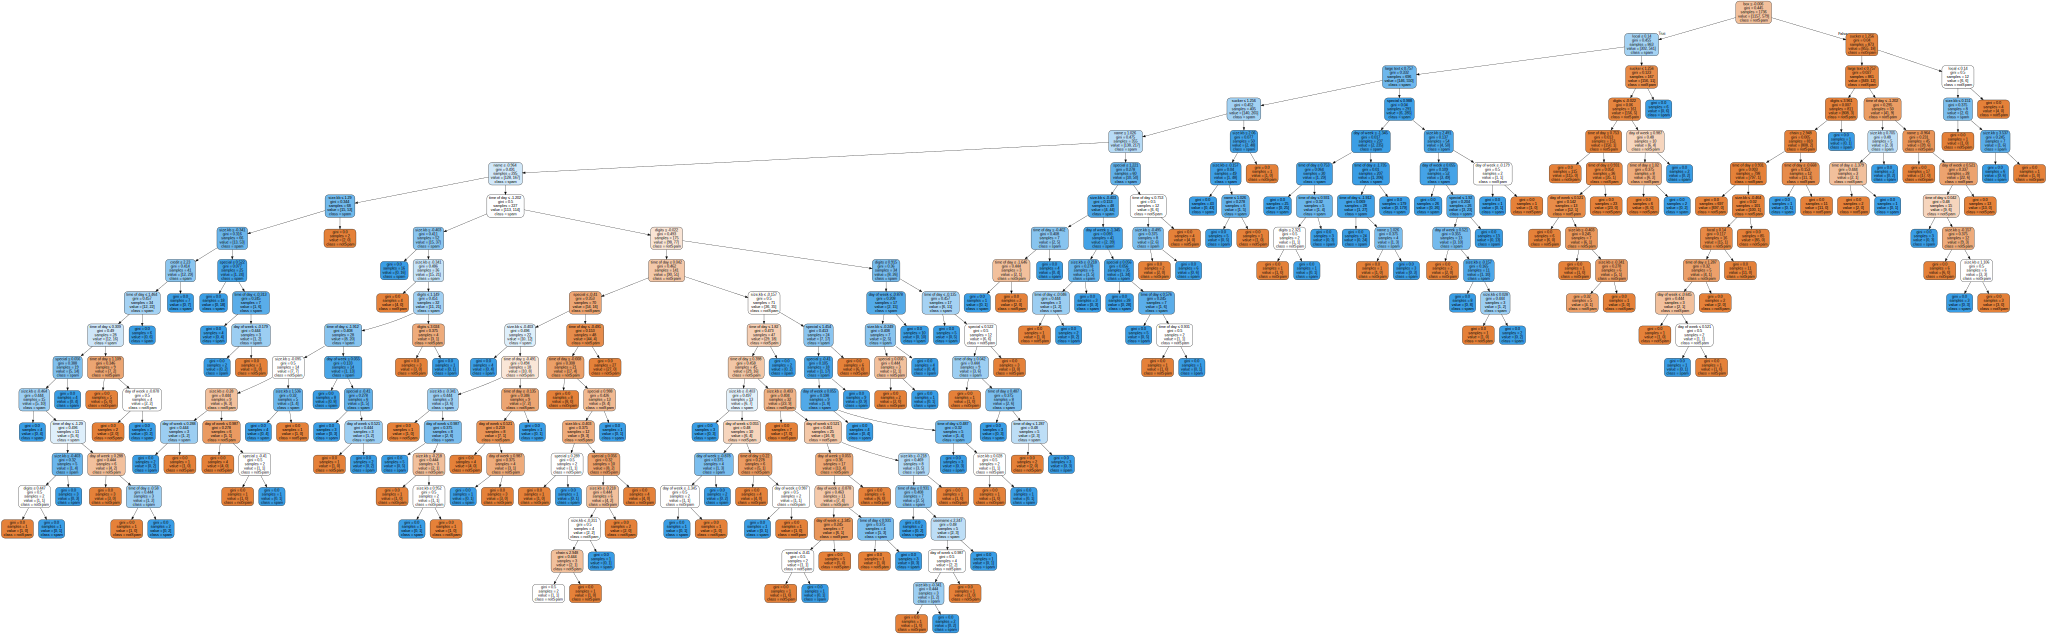

In [457]:
dt = tree.DecisionTreeClassifier()
dtf = dt.fit(Xtrain_transformed, ytrain)
dot_data = tree.export_graphviz(dt, out_file=None, feature_names=colListNoSpam, class_names=["notSpam","spam"] , filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

### (e)

By deafult GINI index is used for selection.

### (f)

In [458]:
ypred_test = dtf.predict(Xtest_transformed)
print("Accuracy:", round(metrics.accuracy_score(ytest, ypred_test),2))

matrix = confusion_matrix(ytest, ypred_test)
total=sum(sum(matrix))
sensitivity = matrix[0,0]/(matrix[0,0]+matrix[0,1])
specificity = matrix[1,1]/(matrix[1,0]+matrix[1,1])
print("Sensitivity:", round(sensitivity,2))
print("Specificity:", round(specificity,2))

fpr, tpr, thresholds = metrics.roc_curve(ytest, ypred_test)
print("AUC:", round(metrics.auc(fpr, tpr), 2))

Accuracy: 0.91
Sensitivity: 0.95
Specificity: 0.82
AUC: 0.88


### (g)

Accuracy: 0.89
Sensitivity: 0.87
Specificity: 0.93
AUC: 0.9


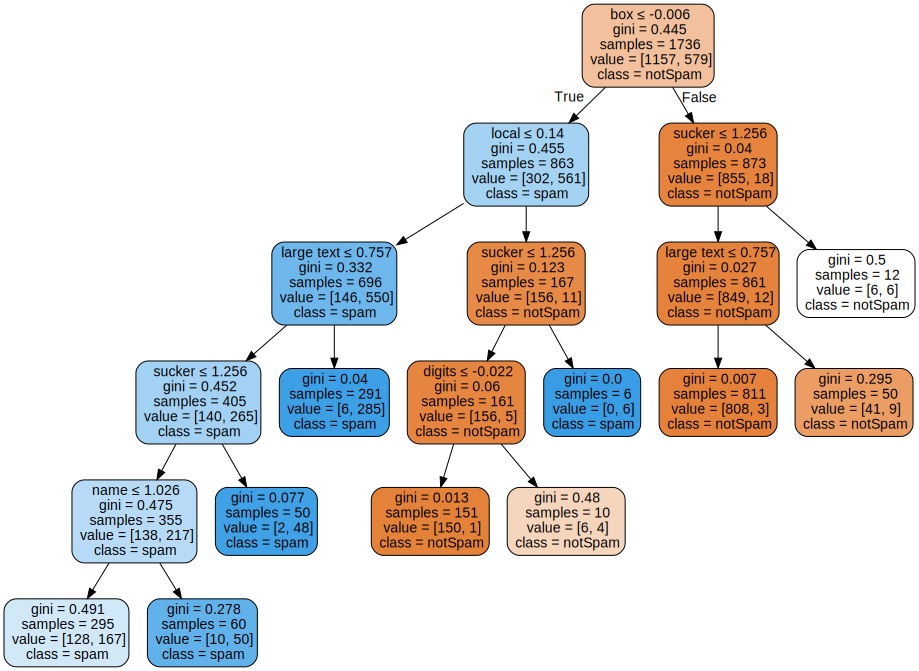

In [459]:
dt = tree.DecisionTreeClassifier(max_leaf_nodes = 10, min_samples_leaf = 5, max_depth= 5)
dtf = dt.fit(Xtrain_transformed, ytrain)
dot_data = tree.export_graphviz(dt, out_file=None, feature_names=colListNoSpam, class_names=["notSpam","spam"] , filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)

ypred_test = dtf.predict(Xtest_transformed)
print("Accuracy:", round(metrics.accuracy_score(ytest, ypred_test),2))

matrix = confusion_matrix(ytest, ypred_test)
total=sum(sum(matrix))
sensitivity = matrix[0,0]/(matrix[0,0]+matrix[0,1])
specificity = matrix[1,1]/(matrix[1,0]+matrix[1,1])
print("Sensitivity:", round(sensitivity,2))
print("Specificity:", round(specificity,2))

fpr, tpr, thresholds = metrics.roc_curve(ytest, ypred_test)
print("AUC:", round(metrics.auc(fpr, tpr), 2))

graph

## Question 7: Spam Spam Spam

### (a) + (b)

In [460]:
xData = spamNum[colListNoSpam].to_numpy()
yData = spamNum["spam"].to_numpy()

finalDataAcc = []
finalDataSen = []
finalDataSpe = []
finalDataAuc = []

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=3)
for trainIndex, testIndex in skf.split(xData, yData):
    #clear arrays
    acc = []
    sen = []
    spe = []
    auc = []

    #set up data
    x_train, x_test = xData[trainIndex], xData[testIndex]
    y_train, y_test = yData[trainIndex], yData[testIndex]
    scaler = preprocessing.MinMaxScaler().fit(x_train)
    x_train_transformed = scaler.transform(x_train)
    x_test_transformed = scaler.transform(x_test)
    
    #knn 3 - 15
    for n in [3,7,11,15]:
        knn = neighbors.KNeighborsClassifier(n_neighbors=n)
        knn.fit(x_train_transformed, y_train)
        y_pred_test = knn.predict(x_test_transformed)
        matrix = confusion_matrix(y_test, y_pred_test)
        total=sum(sum(matrix))
        sensitivity = matrix[0,0]/(matrix[0,0]+matrix[0,1])
        specificity = matrix[1,1]/(matrix[1,0]+matrix[1,1])
        fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_test)
        acc.append(round(metrics.accuracy_score(y_test, y_pred_test),2))
        sen.append(round(sensitivity,2))
        spe.append(round(specificity,2))
        auc.append(round(metrics.auc(fpr, tpr), 2))

    #decision tree full
    dt = tree.DecisionTreeClassifier()
    dtf = dt.fit(x_train_transformed, y_train)
    y_pred_test = dtf.predict(x_test_transformed)
    matrix = confusion_matrix(y_test, y_pred_test)
    total=sum(sum(matrix))
    sensitivity = matrix[0,0]/(matrix[0,0]+matrix[0,1])
    specificity = matrix[1,1]/(matrix[1,0]+matrix[1,1])
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_test)
    acc.append(round(metrics.accuracy_score(y_test, y_pred_test),2))
    sen.append(round(sensitivity,2))
    spe.append(round(specificity,2))
    auc.append(round(metrics.auc(fpr, tpr), 2))

    #decision tree prunned
    dt = tree.DecisionTreeClassifier(max_leaf_nodes = 10, min_samples_leaf = 5, max_depth= 5)
    dtf = dt.fit(x_train_transformed, y_train)
    y_pred_test = dtf.predict(x_test_transformed)
    matrix = confusion_matrix(y_test, y_pred_test)
    total=sum(sum(matrix))
    sensitivity = matrix[0,0]/(matrix[0,0]+matrix[0,1])
    specificity = matrix[1,1]/(matrix[1,0]+matrix[1,1])
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_test)
    acc.append(round(metrics.accuracy_score(y_test, y_pred_test),2))
    sen.append(round(sensitivity,2))
    spe.append(round(specificity,2))
    auc.append(round(metrics.auc(fpr, tpr), 2))

    #Naive Bayes
    gnb = naive_bayes.GaussianNB()
    y_pred_test = gnb.fit(x_train_transformed, y_train).predict(x_test_transformed)
    matrix = confusion_matrix(y_test, y_pred_test)
    total=sum(sum(matrix))
    sensitivity = matrix[0,0]/(matrix[0,0]+matrix[0,1])
    specificity = matrix[1,1]/(matrix[1,0]+matrix[1,1])
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_test)
    acc.append(round(metrics.accuracy_score(y_test, y_pred_test),2))
    sen.append(round(sensitivity,2))
    spe.append(round(specificity,2))
    auc.append(round(metrics.auc(fpr, tpr), 2))

    #append final data
    finalDataAcc.append(acc)
    finalDataSen.append(sen)
    finalDataSpe.append(spe)
    finalDataAuc.append(auc)

dfAcc = pd.DataFrame(data=finalDataAcc, index=["F_1", "F_2", "F_3", "F_4", "F_5", "F_6", "F_7", "F_8", "F_9", "F_10"], columns=["kNN_3","kNN_7","kNN_11","kNN_15","TreeF","TreeP","NB"])
dfSen = pd.DataFrame(data=finalDataSen, index=["F_1", "F_2", "F_3", "F_4", "F_5", "F_6", "F_7", "F_8", "F_9", "F_10"], columns=["kNN_3","kNN_7","kNN_11","kNN_15","TreeF","TreeP","NB"])
dfSpe = pd.DataFrame(data=finalDataSpe, index=["F_1", "F_2", "F_3", "F_4", "F_5", "F_6", "F_7", "F_8", "F_9", "F_10"], columns=["kNN_3","kNN_7","kNN_11","kNN_15","TreeF","TreeP","NB"])
dfAuc = pd.DataFrame(data=finalDataAuc, index=["F_1", "F_2", "F_3", "F_4", "F_5", "F_6", "F_7", "F_8", "F_9", "F_10"], columns=["kNN_3","kNN_7","kNN_11","kNN_15","TreeF","TreeP","NB"])

dfAcc.loc['mean'] = dfAcc.mean()
dfSen.loc['mean'] = dfSen.mean()
dfSpe.loc['mean'] = dfSpe.mean()
dfAuc.loc['mean'] = dfAuc.mean()

print("Accuracy:")
display(dfAcc)

print("\nSensitivity:")
display(dfSen)

print("\nSpecificity:")
display(dfSpe)

print("\nAuc:")
display(dfAuc)

Accuracy:


,kNN_3,kNN_7,kNN_11,kNN_15,TreeF,TreeP,NB
F_1,0.900,0.910,0.910,0.910,0.900,0.890,0.890
F_2,0.900,0.910,0.910,0.900,0.920,0.890,0.890
F_3,0.880,0.900,0.900,0.910,0.880,0.880,0.880
F_4,0.920,0.930,0.940,0.940,0.940,0.910,0.920
F_5,0.920,0.890,0.900,0.890,0.880,0.900,0.880
F_6,0.890,0.890,0.880,0.890,0.890,0.880,0.880
F_7,0.920,0.910,0.920,0.930,0.930,0.870,0.880
F_8,0.920,0.930,0.920,0.920,0.940,0.900,0.870
F_9,0.930,0.920,0.920,0.910,0.940,0.890,0.900
F_10,0.930,0.920,0.930,0.940,0.900,0.920,0.890



Sensitivity:


,kNN_3,kNN_7,kNN_11,kNN_15,TreeF,TreeP,NB
F_1,0.940,0.940,0.940,0.940,0.930,0.860,0.960
F_2,0.920,0.950,0.950,0.940,0.940,0.850,0.960
F_3,0.880,0.900,0.900,0.900,0.940,0.830,0.940
F_4,0.970,0.950,0.960,0.960,0.970,0.900,0.980
F_5,0.960,0.930,0.950,0.940,0.920,0.880,0.960
F_6,0.890,0.890,0.890,0.890,0.900,0.840,0.950
F_7,0.950,0.940,0.950,0.960,0.940,0.820,0.940
F_8,0.970,0.950,0.950,0.960,0.980,0.880,0.960
F_9,0.960,0.950,0.940,0.940,0.970,0.880,0.970
F_10,0.980,0.980,0.980,0.990,0.980,0.910,0.970



Specificity:


,kNN_3,kNN_7,kNN_11,kNN_15,TreeF,TreeP,NB
F_1,0.83,0.860,0.850,0.860,0.850,0.960,0.760
F_2,0.86,0.850,0.850,0.820,0.870,0.970,0.750
F_3,0.87,0.890,0.900,0.920,0.770,0.970,0.770
F_4,0.83,0.890,0.900,0.900,0.860,0.930,0.790
F_5,0.85,0.820,0.800,0.800,0.800,0.960,0.720
F_6,0.90,0.900,0.870,0.890,0.890,0.970,0.730
F_7,0.86,0.860,0.860,0.860,0.920,0.990,0.750
F_8,0.82,0.870,0.860,0.850,0.870,0.940,0.680
F_9,0.86,0.850,0.870,0.860,0.890,0.920,0.760
F_10,0.82,0.790,0.820,0.830,0.750,0.940,0.730



Auc:


,kNN_3,kNN_7,kNN_11,kNN_15,TreeF,TreeP,NB
F_1,0.880,0.900,0.890,0.90,0.890,0.910,0.860
F_2,0.890,0.900,0.900,0.88,0.910,0.910,0.850
F_3,0.880,0.900,0.900,0.91,0.860,0.900,0.860
F_4,0.900,0.920,0.930,0.93,0.920,0.920,0.880
F_5,0.900,0.870,0.870,0.87,0.860,0.920,0.840
F_6,0.900,0.900,0.880,0.89,0.890,0.910,0.840
F_7,0.910,0.900,0.900,0.91,0.930,0.900,0.840
F_8,0.890,0.910,0.910,0.90,0.930,0.910,0.820
F_9,0.910,0.900,0.910,0.90,0.930,0.900,0.870
F_10,0.900,0.880,0.900,0.91,0.860,0.930,0.850
